<a href="https://colab.research.google.com/github/Rugved-7/Credit_card_fault_detection/blob/main/Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [37]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [38]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,154209.000000,154209.000000,154209.000000,154209.000000,154209.000000,154208.000000,154208.000000,154208.000000,154208.000000,154208.000000,...,154208.000000,154208.000000,154208.000000,154208.000000,154208.000000,154208.000000,154208.000000,154208.000000,154208.000000,154208.000000
mean,55352.060651,-0.231368,0.044927,0.602084,0.135578,-0.236049,0.070016,-0.104593,0.050863,-0.023907,...,-0.036964,-0.108737,-0.027772,0.011249,0.114206,0.023329,0.001695,0.002887,88.442993,0.002159
std,22758.504584,1.839863,1.621691,1.329869,1.353338,1.327293,1.289920,1.198674,1.239169,1.136415,...,0.742366,0.647203,0.585339,0.595880,0.450289,0.490937,0.392161,0.312150,245.956065,0.046420
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.481456,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,39432.000000,-1.019801,-0.539674,0.093871,-0.722621,-0.872988,-0.674954,-0.599540,-0.143906,-0.683508,...,-0.228961,-0.551275,-0.170458,-0.327985,-0.161191,-0.325588,-0.062826,-0.010017,5.900000,0.000000
50%,56890.000000,-0.254925,0.118782,0.703239,0.155851,-0.278693,-0.187012,-0.051361,0.072612,-0.113942,...,-0.059854,-0.084098,-0.041400,0.064959,0.153875,-0.054710,0.010793,0.022821,22.500000,0.000000
75%,73958.000000,1.165940,0.804629,1.336420,0.974174,0.296027,0.458456,0.435016,0.367910,0.578515,...,0.114920,0.321207,0.089631,0.411404,0.412505,0.289658,0.089736,0.078203,78.650000,0.000000
max,100913.000000,2.401777,18.902453,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [39]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154209 entries, 0 to 154208
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    154209 non-null  float64
 1   V1      154209 non-null  float64
 2   V2      154209 non-null  float64
 3   V3      154209 non-null  float64
 4   V4      154209 non-null  float64
 5   V5      154208 non-null  float64
 6   V6      154208 non-null  float64
 7   V7      154208 non-null  float64
 8   V8      154208 non-null  float64
 9   V9      154208 non-null  float64
 10  V10     154208 non-null  float64
 11  V11     154208 non-null  float64
 12  V12     154208 non-null  float64
 13  V13     154208 non-null  float64
 14  V14     154208 non-null  float64
 15  V15     154208 non-null  float64
 16  V16     154208 non-null  float64
 17  V17     154208 non-null  float64
 18  V18     154208 non-null  float64
 19  V19     154208 non-null  float64
 20  V20     154208 non-null  float64
 21  V21     15

In [40]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

<Axes: ylabel='count'>

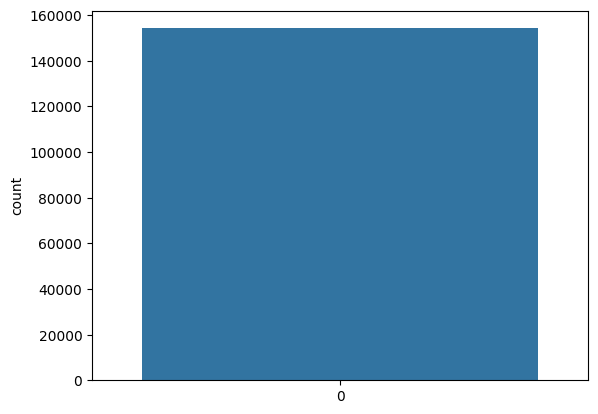

In [41]:
sns.countplot(df['Class'])

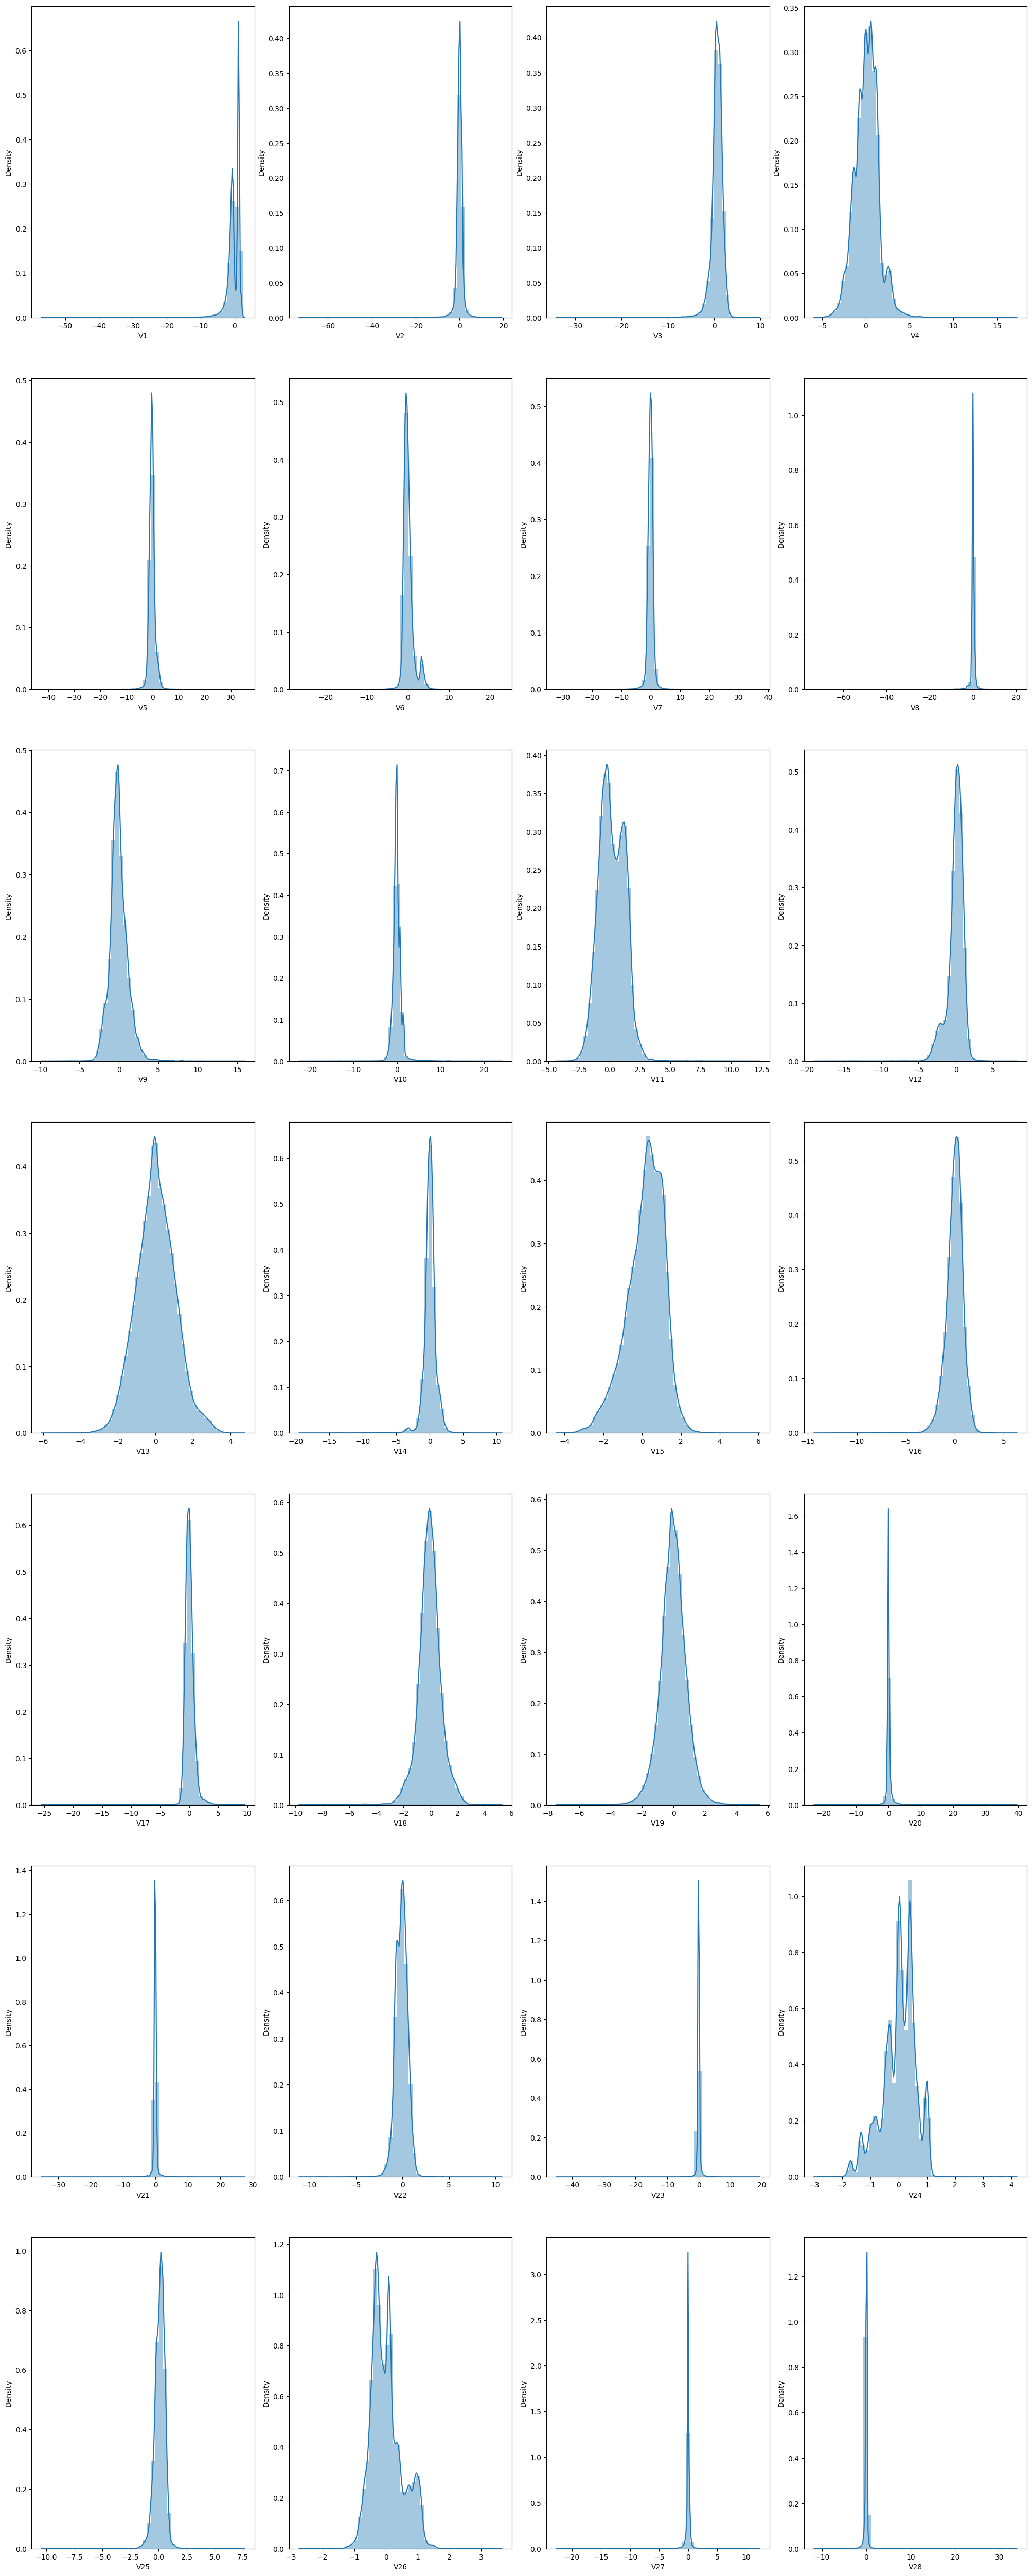

In [42]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Time', ylabel='Density'>

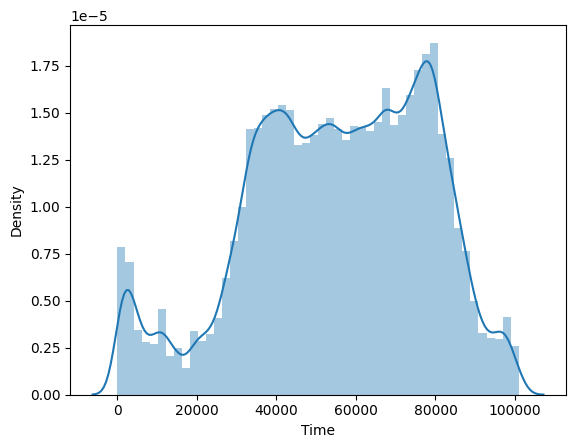

In [43]:
sns.distplot(df['Time'])

<Axes: xlabel='Amount', ylabel='Density'>

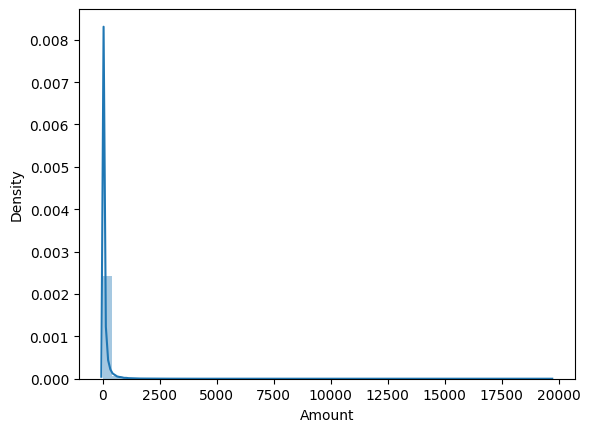

In [44]:
sns.distplot(df['Amount'])

<Axes: >

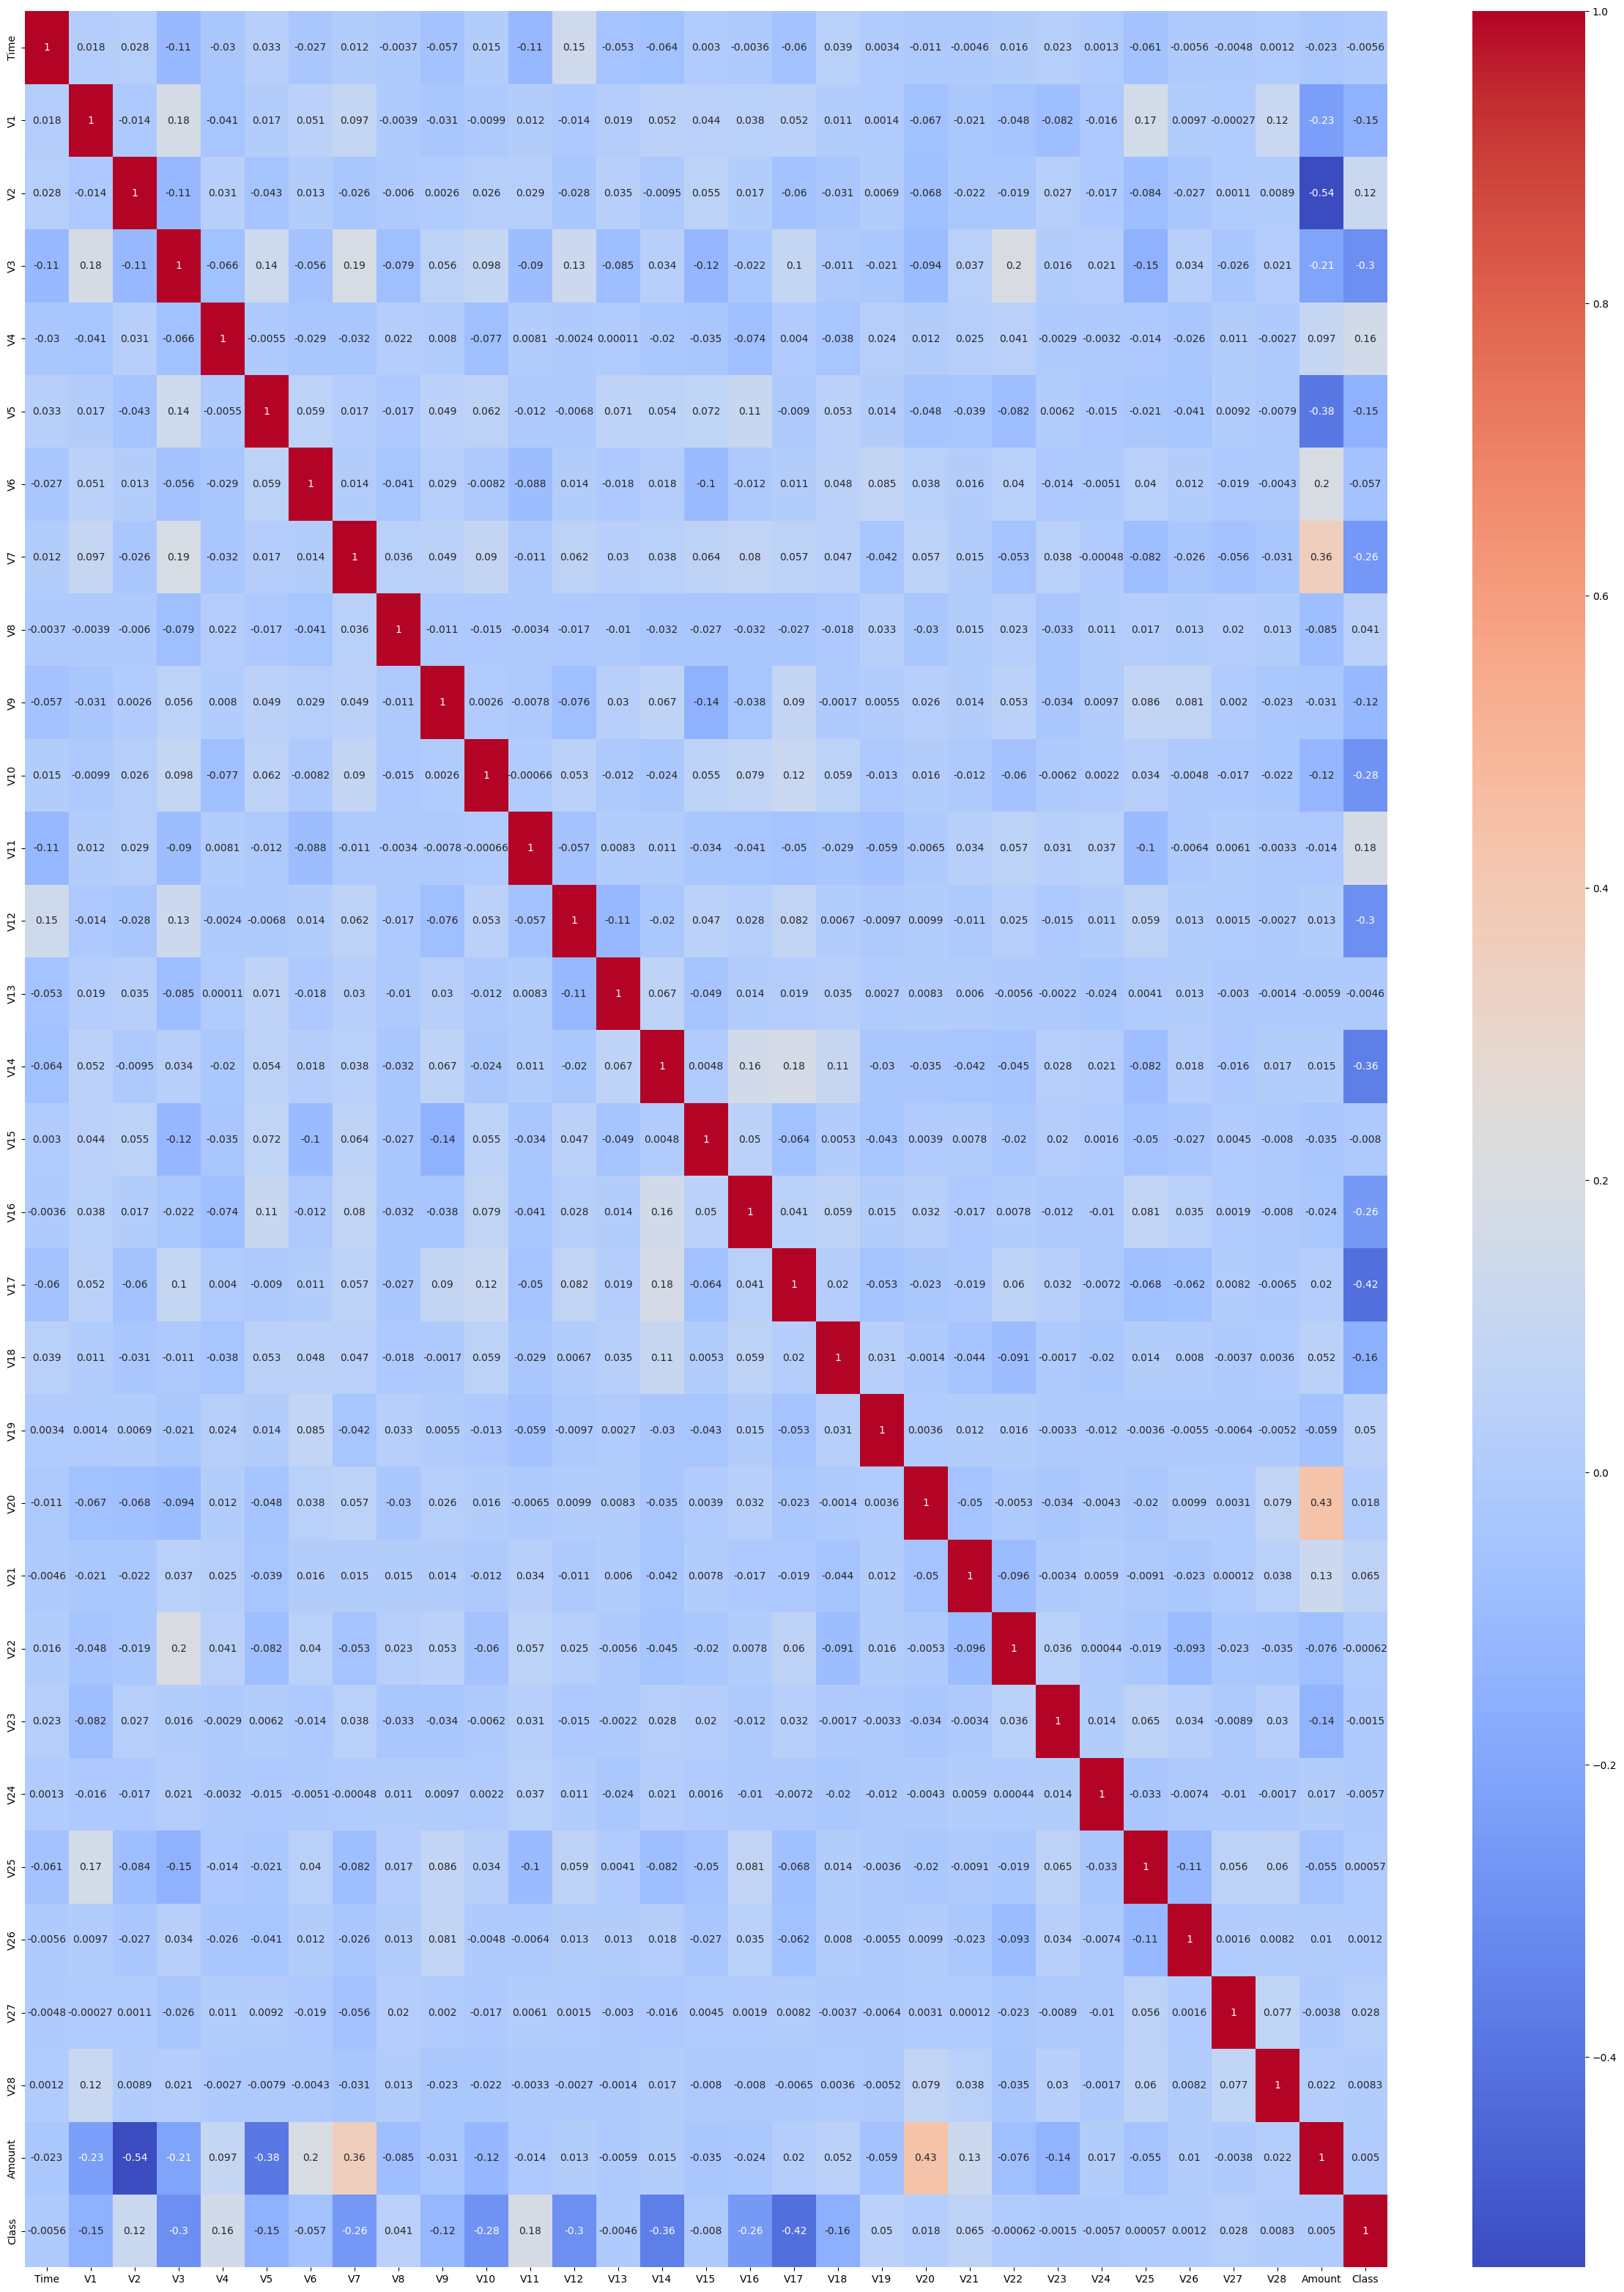

In [45]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [46]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [48]:
x_scaler[-1]


array([ 2.00193677, -0.60800258,  0.35330933,  0.87621295, -0.7589686 ,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

In [49]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

ValueError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

In [ ]:
sns.countplot(y_train)

In [ ]:
# hint - use combination of over sampling and under sampling
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

In [ ]:
sns.countplot(y_smote)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))